<a href="https://colab.research.google.com/github/alfranc/Rumor_RvNN/blob/master/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
cd gdrive/'My Drive'

/content/gdrive/My Drive


In [5]:
cd COMP777

/content/gdrive/My Drive/COMP777


In [6]:
cd Assign2

/content/gdrive/My Drive/COMP777/Assign2


In [0]:
import tweepy
from tweepy import OAuthHandler
 
## FILL IN YOUR OWN DETAILS HERE ##
consumer_key = '2ivELbzpCdNN8EtwmLzFYE8k9'  
consumer_secret = 'mwb6oI21Vv5sJT0ubn9CtzEVlfyrjHRBucgegXoqQC126F5KNz'
access_token = '1164667078420205568-pUOEAvZmAhH990j5kgIQj15gcIs9n8'
access_secret = 'c8WGbWuBo2EB4YF0wCVRKkESszcTzuv65GifkxUeVLMCh'
##
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

user1 = api.get_user('barackobama')
user2 = api.get_user('lewishamilton')
print (user2.screen_name)
print (user2.name)
print(user1.screen_name)
print (user1.name)


In [0]:
tweets1 = api.user_timeline(screen_name = 'lewishamilton', count = 5,tweet_mode='extended')
for t in tweets1:
  print(t.full_text)
tweets2 = api.user_timeline(screen_name = ' barackobama', count = 5,tweet_mode='extended')
for t in tweets2:
  print(t.full_text)

In [0]:
import json
TWEETFILE1 = 'barack_obama.json'
TWEETFILE2 = 'lewis_hamilton.json'

tweets1 = api.user_timeline(screen_name = 'barackobama', count = 200,tweet_mode='extended')
tweets2 = api.user_timeline(screen_name = 'lewishamilton', count = 200,tweet_mode='extended')

with open(TWEETFILE1, 'w') as outfile:
    for tweet in tweets1:
        json.dump(tweet._json, outfile, sort_keys=True)
        outfile.write('\n')
        print(tweet.full_text)
with open(TWEETFILE2, 'w') as outfile:
    for tweet in tweets2:
        json.dump(tweet._json, outfile, sort_keys=True)
        outfile.write('\n')
        print(tweet.full_text)


In [0]:
import pandas as pd

tweets1 = api.user_timeline(screen_name = 'barackobama', count = 200,tweet_mode='extended')
tweets2 = api.user_timeline(screen_name = 'lewishamilton', count = 200,tweet_mode='extended')
tweet_data1 = [[tweet.user.screen_name, tweet.created_at,tweet.entities,tweet.full_text] for tweet in tweets1]
tweet_data2 = [[tweet.user.screen_name, tweet.created_at,tweet.entities,tweet.full_text] for tweet in tweets2]
data1 = pd.DataFrame(data=tweet_data1, columns=['user', "creation time","entities","full_text"])
data2 = pd.DataFrame(data=tweet_data2, columns=['user', "creation time","entities","full_text"])

In [0]:
display(data1)
display(data2)

In [0]:
df_row_reindex = pd.concat([data1, data2], ignore_index=True)
display(df_row_reindex)

In [0]:
df_row_reindex['hour_of_posting'] = df_row_reindex['creation time'].dt.hour
print(df_row_reindex)

In [0]:
import matplotlib.pyplot as plt
df_posting_time_percent = pd.crosstab(df_row_reindex.user,df_row_reindex.hour_of_posting,
                         normalize = 'index').rename_axis(None)

In [15]:
df_posting_time_percent*=100
display(df_posting_time_percent)



hour_of_posting,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
BarackObama,2.0,2.5,0.0,1.5,2.5,0.5,0.0,0.0,0.0,0.0,0.0,0.5,1.0,7.5,9.0,9.0,17.5,5.5,12.5,10.5,8.0,6.5,2.0,1.5
LewisHamilton,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.5,3.5,2.5,5.0,8.0,6.5,9.5,5.5,6.5,12.5,10.0,12.5,5.5,7.0,3.0,0.5,0.5


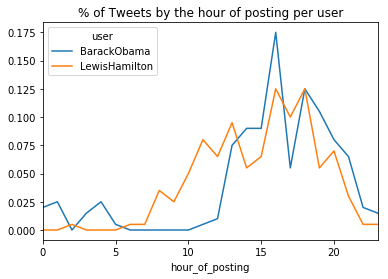

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt=pd.crosstab(df_row_reindex.hour_of_posting,df_row_reindex.user,normalize = 'columns').plot(kind='line',title="% of Tweets by the hour of posting per user")







In [0]:
data4 = pd.read_json("barack_obama.json", orient = 'records', lines = True)
data4['user'] ="BarackObama"
data5 = pd.read_json("lewis_hamilton.json", orient = 'records', lines = True)
data5['user'] ="LewisHamilton"

In [0]:
display(data4)
display(data5)

In [0]:
df_combined= pd.concat([data4, data5], ignore_index=True)
display(df_combined)

In [0]:
df_combined.to_csv('combined_tweets.csv')

In [0]:
print (df_combined.extended_entities.values)

In [0]:
print (df_combined.entities.values)

In [0]:
display(df_combined.full_text.values)

In [0]:

df_combined['Hashtag']=df_combined.entities.count()

In [0]:
display(df_combined)

In [0]:
df_combined.drop(columns=['Hashtag'])

In [0]:
def is_Barack_user(user):
    if 'BarackObama' in user:
        return "Yes"
    elif 'LewisHamilton' in user:
        return "No"
    else:
        return "Undetermined"
        
df_combined['IsBarackObama'] = df_combined.apply(lambda x: is_Barack_user(x['user']),axis=1)

In [0]:
display(df_combined)

In [129]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 35 columns):
contributors                 0 non-null float64
coordinates                  0 non-null float64
created_at                   400 non-null datetime64[ns]
display_text_range           400 non-null object
entities                     400 non-null object
extended_entities            240 non-null object
favorite_count               400 non-null int64
favorited                    400 non-null bool
full_text                    400 non-null object
geo                          0 non-null float64
id                           400 non-null int64
id_str                       400 non-null int64
in_reply_to_screen_name      32 non-null object
in_reply_to_status_id        32 non-null float64
in_reply_to_status_id_str    32 non-null float64
in_reply_to_user_id          32 non-null float64
in_reply_to_user_id_str      32 non-null float64
is_quote_status              400 non-null bool
lang            

In [0]:

df_combined['MediaIncluded']=df_combined['entities'].str.contains('media',regex=False).apply(lambda x: 1 if x == True else 0)


In [0]:
display(df_combined)

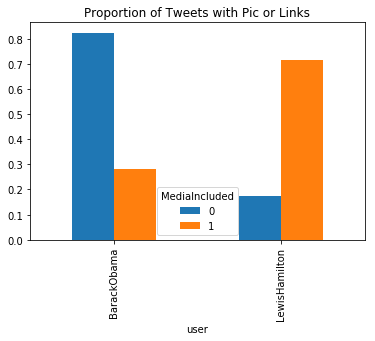

In [101]:
plt=pd.crosstab(df_combined.user,df_combined.MediaIncluded,normalize='columns').plot(kind='bar',title="Proportion of Tweets with Pic or Links")


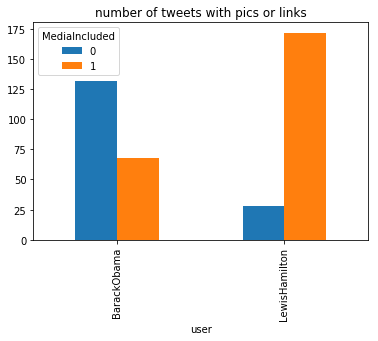

In [102]:
plt=pd.crosstab(df_combined.user,df_combined.MediaIncluded).plot(kind='bar',title="number of tweets with pics or links")

In [0]:
df_combined['Hashtags']=df_combined['full_text'].str.count('#')

In [0]:
display(df_combined)

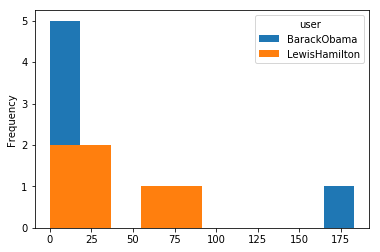

In [114]:
plt=pd.crosstab(df_combined.Hashtags,df_combined.user).plot(kind='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2245ccc588>]],
      dtype=object)

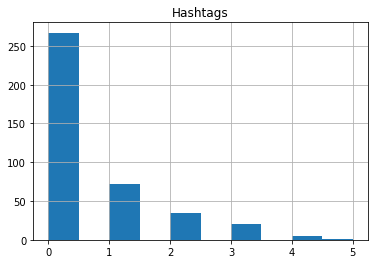

In [119]:
df_combined.hist(column='Hashtags')


In [0]:
filtered_df_combined_BarackObama = df_combined.loc[df_combined['user'] == 'BarackObama']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2245d2a0b8>]],
      dtype=object)

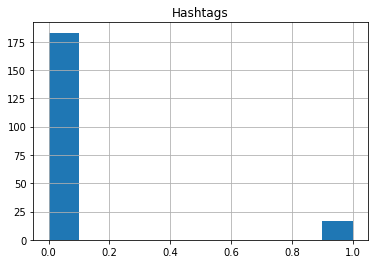

In [137]:

filtered_df_combined_BarackObama.hist(column='Hashtags')


In [0]:
filtered_df_combined_LewisHamilton = df_combined.loc[df_combined['user'] == 'LewisHamilton']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2247f8fd30>]],
      dtype=object)

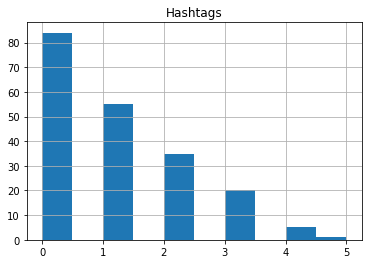

In [127]:
filtered_df_combined_LewisHamilton.hist(column='Hashtags')

In [0]:
display(df_combined)

adapted from https://www.earthdatascience.org/courses/earth-analytics-python/using-apis-natural-language-processing-twitter/calculate-tweet-word-frequencies-in-python/

In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

In [0]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

filtered_df_combined_BarackObama['TweetNoURLs']=filtered_df_combined_BarackObama['full_text'].apply(lambda x: remove_url(x))

In [0]:
print(filtered_df_combined_BarackObama.TweetNoURLs.values)

In [153]:
filtered_df_combined_BarackObama['lowercaseTweetNoURLs']=filtered_df_combined_BarackObama['TweetNoURLs'].lower().split()

AttributeError: ignored